In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
df=df.drop(columns = ['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Email', 'Contacts', 'Port_modem', 'Tablet', 'InternetService',
                     'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                     'Tenure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'PaymentMethod', 'Marital'])
nulls = df.isnull().any()
print (nulls)

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
Children                False
Age                     False
Income                  False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Yearly_equip_failure    False
Techie                  False
Contract                False
MonthlyCharge           False
Bandwidth_GB_Year       False
dtype: bool


In [4]:
df.describe

<bound method NDFrame.describe of       CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID  Children  Age    Income  Gender Churn  \
0     e885b299883d4f9fb18e39c75155d990         0   68  2

In [5]:
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

In [6]:
print(df)

      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID  Children  Age    Income  Gender Churn  \
0     e885b299883d4f9fb18e39c75155d990         0   68  28561.99    Male    No   
1     f2d

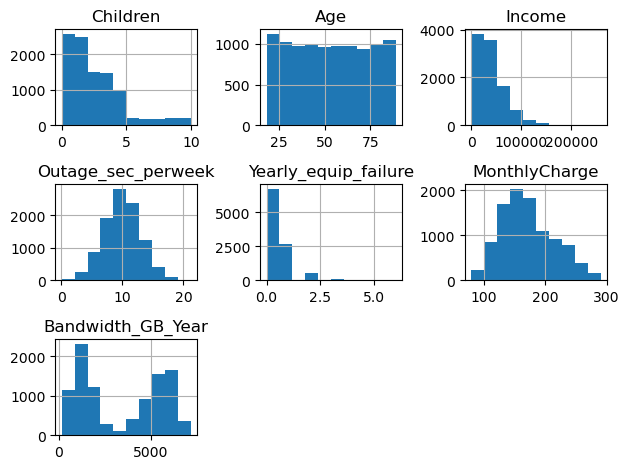

In [7]:
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
plt.tight_layout()

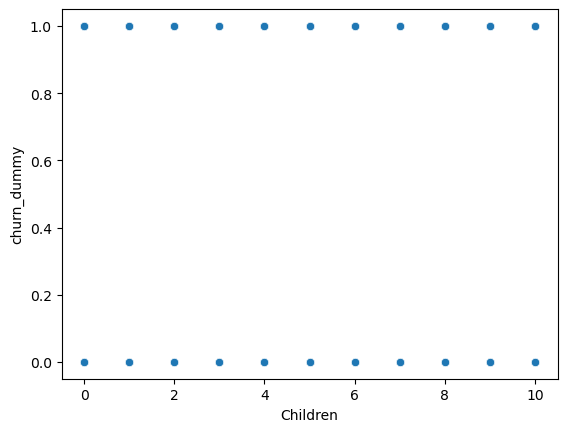

In [8]:
sns.scatterplot(x=df['Children'], y = df['churn_dummy'])
plt.show()

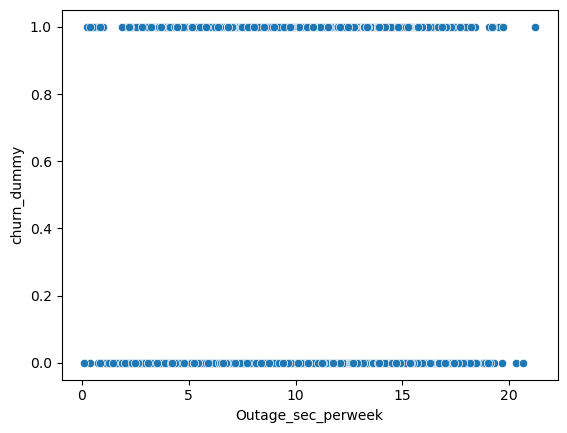

In [9]:
sns.scatterplot(x=df['Outage_sec_perweek'], y = df['churn_dummy'])
plt.show()

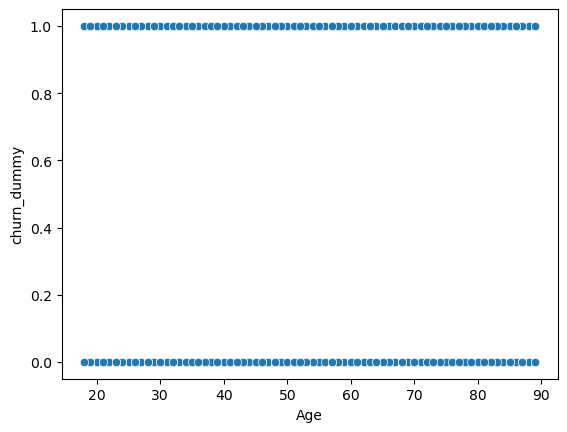

In [10]:
sns.scatterplot(x=df['Age'], y = df['churn_dummy'])
plt.show()

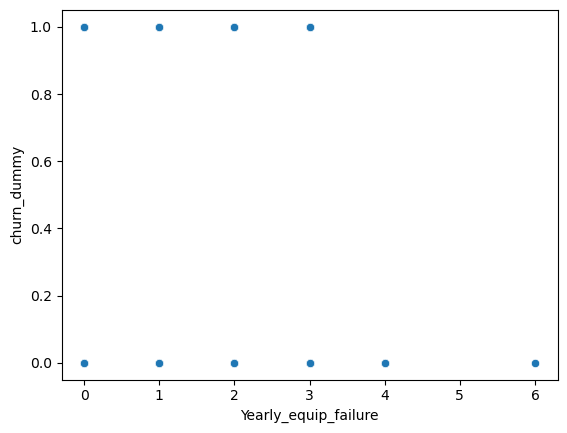

In [11]:
sns.scatterplot(x=df['Yearly_equip_failure'], y = df['churn_dummy'])
plt.show()

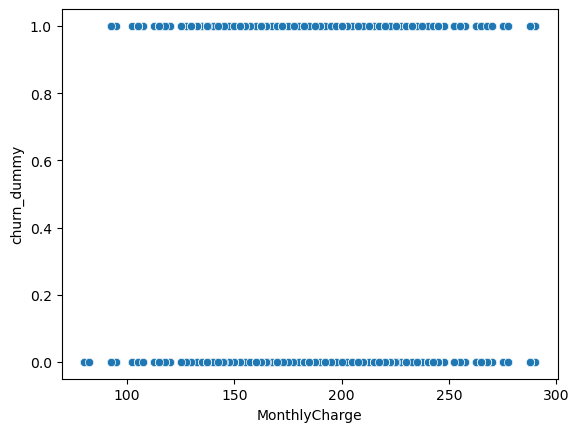

In [12]:
sns.scatterplot(x=df['MonthlyCharge'], y = df['churn_dummy'])
plt.show()

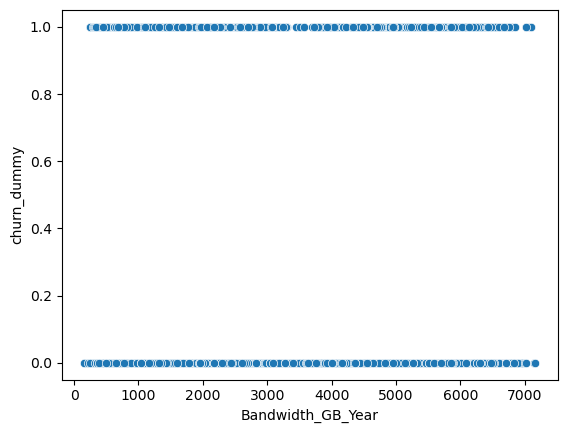

In [13]:
sns.scatterplot(x=df['Bandwidth_GB_Year'], y = df['churn_dummy'])
plt.show()

In [14]:
df['Intercept'] = 1
log_reg_results = sm.Logit(df['churn_dummy'], df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year',
                                                 'gender_dummy', 'Intercept']]).fit()
print(log_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.357089
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                  0.3824
Time:                        01:45:22   Log-Likelihood:                -3570.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                 0.0170      0.014      1.211      0.226      -0.010       0.044

In [15]:
# Get the p-values for each variable
pvalues = log_reg_results.pvalues

# Select the variables with a p-value below 0.05
significant_vars = [var for var in pvalues.index if pvalues[var] < 0.05]

# Build the reduced model using only the significant variables
reduced_model = sm.Logit(df['churn_dummy'], df[significant_vars]).fit()

# Print the summary of the reduced model
print(reduced_model.summary())

Optimization terminated successfully.
         Current function value: 0.357282
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                  0.3821
Time:                        01:45:22   Log-Likelihood:                -3572.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
MonthlyCharge         0.0342      0.001     38.701      0.000       0.032       0.036
Bandwidt

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[significant_vars], df['churn_dummy'], test_size=0.3)

# Fit the logistic regression model on the training data
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[2015  215]
 [ 305  465]]


<AxesSubplot:>

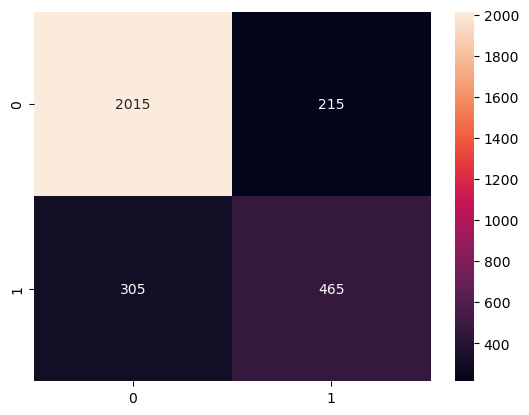

In [17]:
sns.heatmap(confusion_matrix, annot=True, fmt='d')


In [18]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2230
           1       0.68      0.60      0.64       770

    accuracy                           0.83      3000
   macro avg       0.78      0.75      0.76      3000
weighted avg       0.82      0.83      0.82      3000



In [19]:
# Get the coefficients and intercept of the model
coefficients = logistic_regression.coef_[0]
intercept = logistic_regression.intercept_[0]

In [20]:
# Create a list of predictor variable names
predictors = significant_vars[:-1]

In [21]:
# Concatenate the coefficients and intercept term to create the regression equation
equation = 'churn_dummy = '
for i in range(len(predictors)):
    equation += f'{coefficients[i]:.4f} * {predictors[i]} + '
equation += f'{intercept:.4f}'

In [22]:
print(equation)

churn_dummy = 0.0342 * MonthlyCharge + -0.0008 * Bandwidth_GB_Year + -0.2028 * gender_dummy + -2.4186
